**Machine Learning Project: Spam Filter**

Importing required libraries:

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading data from csv file:

In [101]:
df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Exploratory Data Analysis: 

In [102]:
df.shape

(5572, 2)

In [103]:
df.groupby("Category").describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [105]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

No null values.

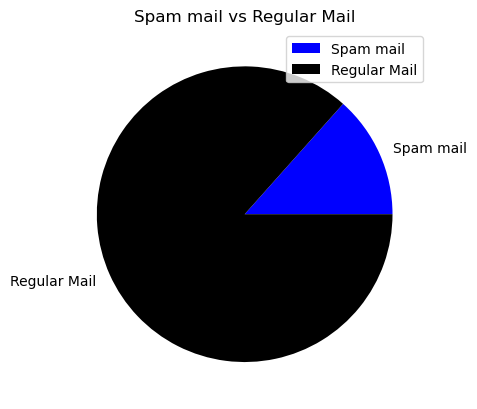

In [106]:
spam = np.sum(df["Category"]=="spam")
ham = np.sum(df["Category"]=="ham")
p = np.array([spam,ham])
plt.pie(p, labels = ["Spam mail", "Regular Mail"], colors=["blue", "black"])
plt.legend()
plt.title("Spam mail vs Regular Mail")
plt.show()

Upon Analysis we observe that: <br>


*   The dataset contains 5572 rows and 2 columns
*   The dataset contains 747 spam mails and 4825 normal mails
*   There are no null values
*   There are 2 colums, Category and Object and both of them store object type values






Data Preprocessing: 

In [107]:
df["spam"]=df["Category"].apply(lambda x:1 if x=="spam" else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


Here we have converted the Category column into a numeric column since our algorithm only considers numeric values.

Splitting the data for Training and Testing the model:

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Message,df.spam)

Data for training:

In [109]:
X_train

4498                                                   Ok
3258    No, but you told me you were going, before you...
3632               Thank you princess! You are so sexy...
2916    Nothing lor... A bit bored too... Then y dun u...
178     Turns out my friends are staying for the whole...
                              ...                        
5410    Daddy, shu shu is looking 4 u... U wan me 2 te...
768                                Sorry, I'll call later
2427    Valentines Day Special! Win over £1000 in our ...
5109                    Oh you got many responsibilities.
88             I'm really not up to it still tonight babe
Name: Message, Length: 4179, dtype: object

In [110]:
y_train

4498    0
3258    0
3632    0
2916    0
178     0
       ..
5410    0
768     0
2427    1
5109    0
88      0
Name: spam, Length: 4179, dtype: int64

Data for testing:

In [111]:
X_test

817     He has lots of used ones babe, but the model d...
4444    You know my old Dom I told you about yesterday...
3793    Love it! I want to flood that pretty pussy wit...
2767    Married local women looking for discreet actio...
1419                  Lmao. Take a pic and send it to me.
                              ...                        
5004    CDs 4u: Congratulations ur awarded £500 of CD ...
2903    Bill, as in: Are there any letters for me. i’m...
2468    Is there coming friday is leave for pongal?do ...
1909    Hello beautiful r u ok? I've kinda ad a row wi...
4577    Congratulations ur awarded 500 of CD vouchers ...
Name: Message, Length: 1393, dtype: object

In [112]:
y_test

817     0
4444    0
3793    0
2767    1
1419    0
       ..
5004    1
2903    0
2468    0
1909    0
4577    1
Name: spam, Length: 1393, dtype: int64

Further Data Preprocessing: 

In [113]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Here we have converted the message value from text to numeric to better suit our model

Training the model:

In [114]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

Testing the model:

In [115]:
emails = [
    'Good morning, when can we schedule the meeting?',
    'Upto 20% discount on new course from udemy, exclusive offer just for you. Dont miss this reward!',
    'Dear customer, your electricity bill is due on the 28th of July. Please click here to pay online.',
    'Congrats! You have just recieved an amazon reward worth 100000!'
]
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1, 0, 1], dtype=int64)

Here 0 refers to normal mail and 1 refers to spam mail

In [116]:
X = v.transform(X_test)
model.predict(X)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [117]:
model.predict(v.transform([X_test[1]]))

array([0], dtype=int64)

Checking accuracy:

In [118]:
accuracy = model.score(X, y_test)*100
print("The accuracy of the model is:", accuracy)

The accuracy of the model is: 98.20531227566404


Automating the code using a pipeline for both count vectoring and naive bayes algorithm:

In [119]:
from sklearn.pipeline import Pipeline
p = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

Fitting the model:

In [120]:
p.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

Predicting:

In [121]:
p.predict(emails)

array([0, 1, 0, 1], dtype=int64)

In [122]:
p.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

Checking accuracy:

In [133]:
p.score(X_test, y_test)*100

98.20531227566404

Implementing other classification algorithms:



*   SVM Classifier:



In [126]:
from sklearn.svm import SVC 
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train_count, y_train)  

SVC(kernel='linear', random_state=0)

In [127]:
y_pred= classifier.predict(X)  

In [128]:
accuracy = classifier.score(X, y_test)*100
print("The accuracy of the model is:", accuracy)

The accuracy of the model is: 98.06173725771716




*   Decision Tree Classifier:



In [129]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train_count, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [130]:
y_pred= classifier.predict(X)  

In [131]:
accuracy = classifier.score(X, y_test)*100
print("The accuracy of the model is:", accuracy)

The accuracy of the model is: 96.76956209619526


Gradio Deployment

In [132]:
import gradio as gr

def predict_spam(text):

    prediction = p.predict([text])


    result = "Spam" if prediction[0] == 1 else "Not Spam"

    return result

iface_spam = gr.Interface(
    fn=predict_spam,
    inputs=[
        gr.components.Textbox(label="Text")
    ],
    outputs=[
    gr.components.Textbox(label="Result"),
    ],
    
    title="Spam Filter",
    description="Enter text to check whether the email is Spam or Not:"
)

iface_spam.launch()

Running on local URL:  http://127.0.0.1:7873

To create a public link, set `share=True` in `launch()`.
